<a href="https://colab.research.google.com/github/Mukuta-Manit-D/PYTORCH-MARATHON/blob/main/2_Getting_Ahead_With_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# After learning about creating and handling tensors with its possible computations, Let's go ahead with its ML and DL workflow with PyTorch

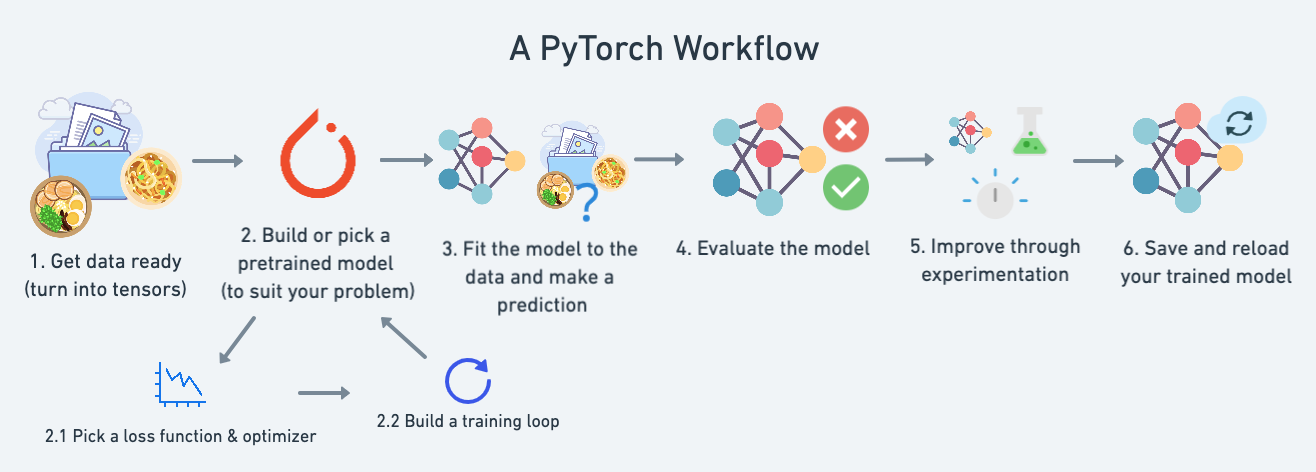

## Setting up the torch and required libraries

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
torch.__version__

'2.8.0+cu126'

## Loading data

In [ ]:
weight = 0.9
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

# Using Simple Linear Regression
y = weight * X + bias

X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3180],
         [0.3360],
         [0.3540],
         [0.3720],
         [0.3900],
         [0.4080],
         [0.4260],
         [0.4440],
         [0.4620]]))

In [ ]:
len(X), len(y)

(50, 50)

## Splitting our Data to Training and Test DataSets

In [ ]:
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing the DATA

In [ ]:
def plot_predictions(train_data: X_train,
                     train_label: y_train,
                     test_data: X_test,
                     test_label: y_test,
                     predictions: None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_label,c="g",s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop = {"size": 4})

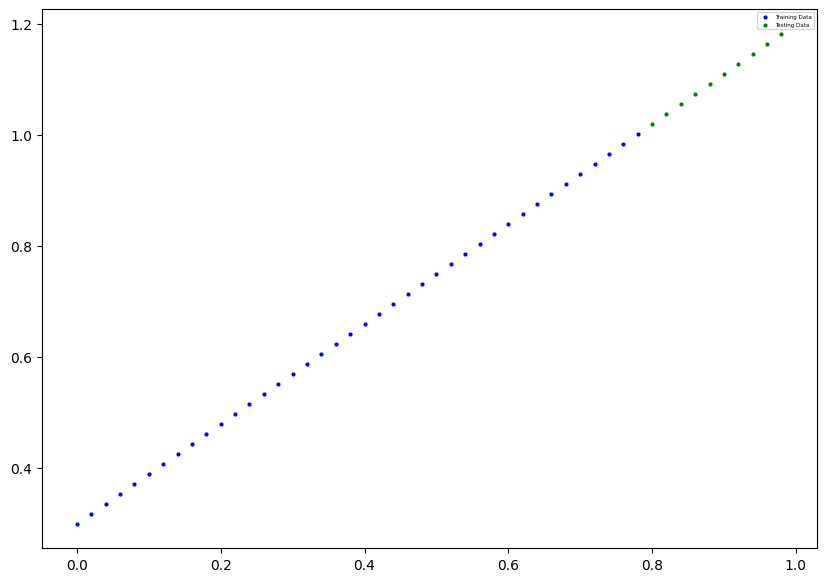

In [ ]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=None)

## Building our First ever PyTorch Model

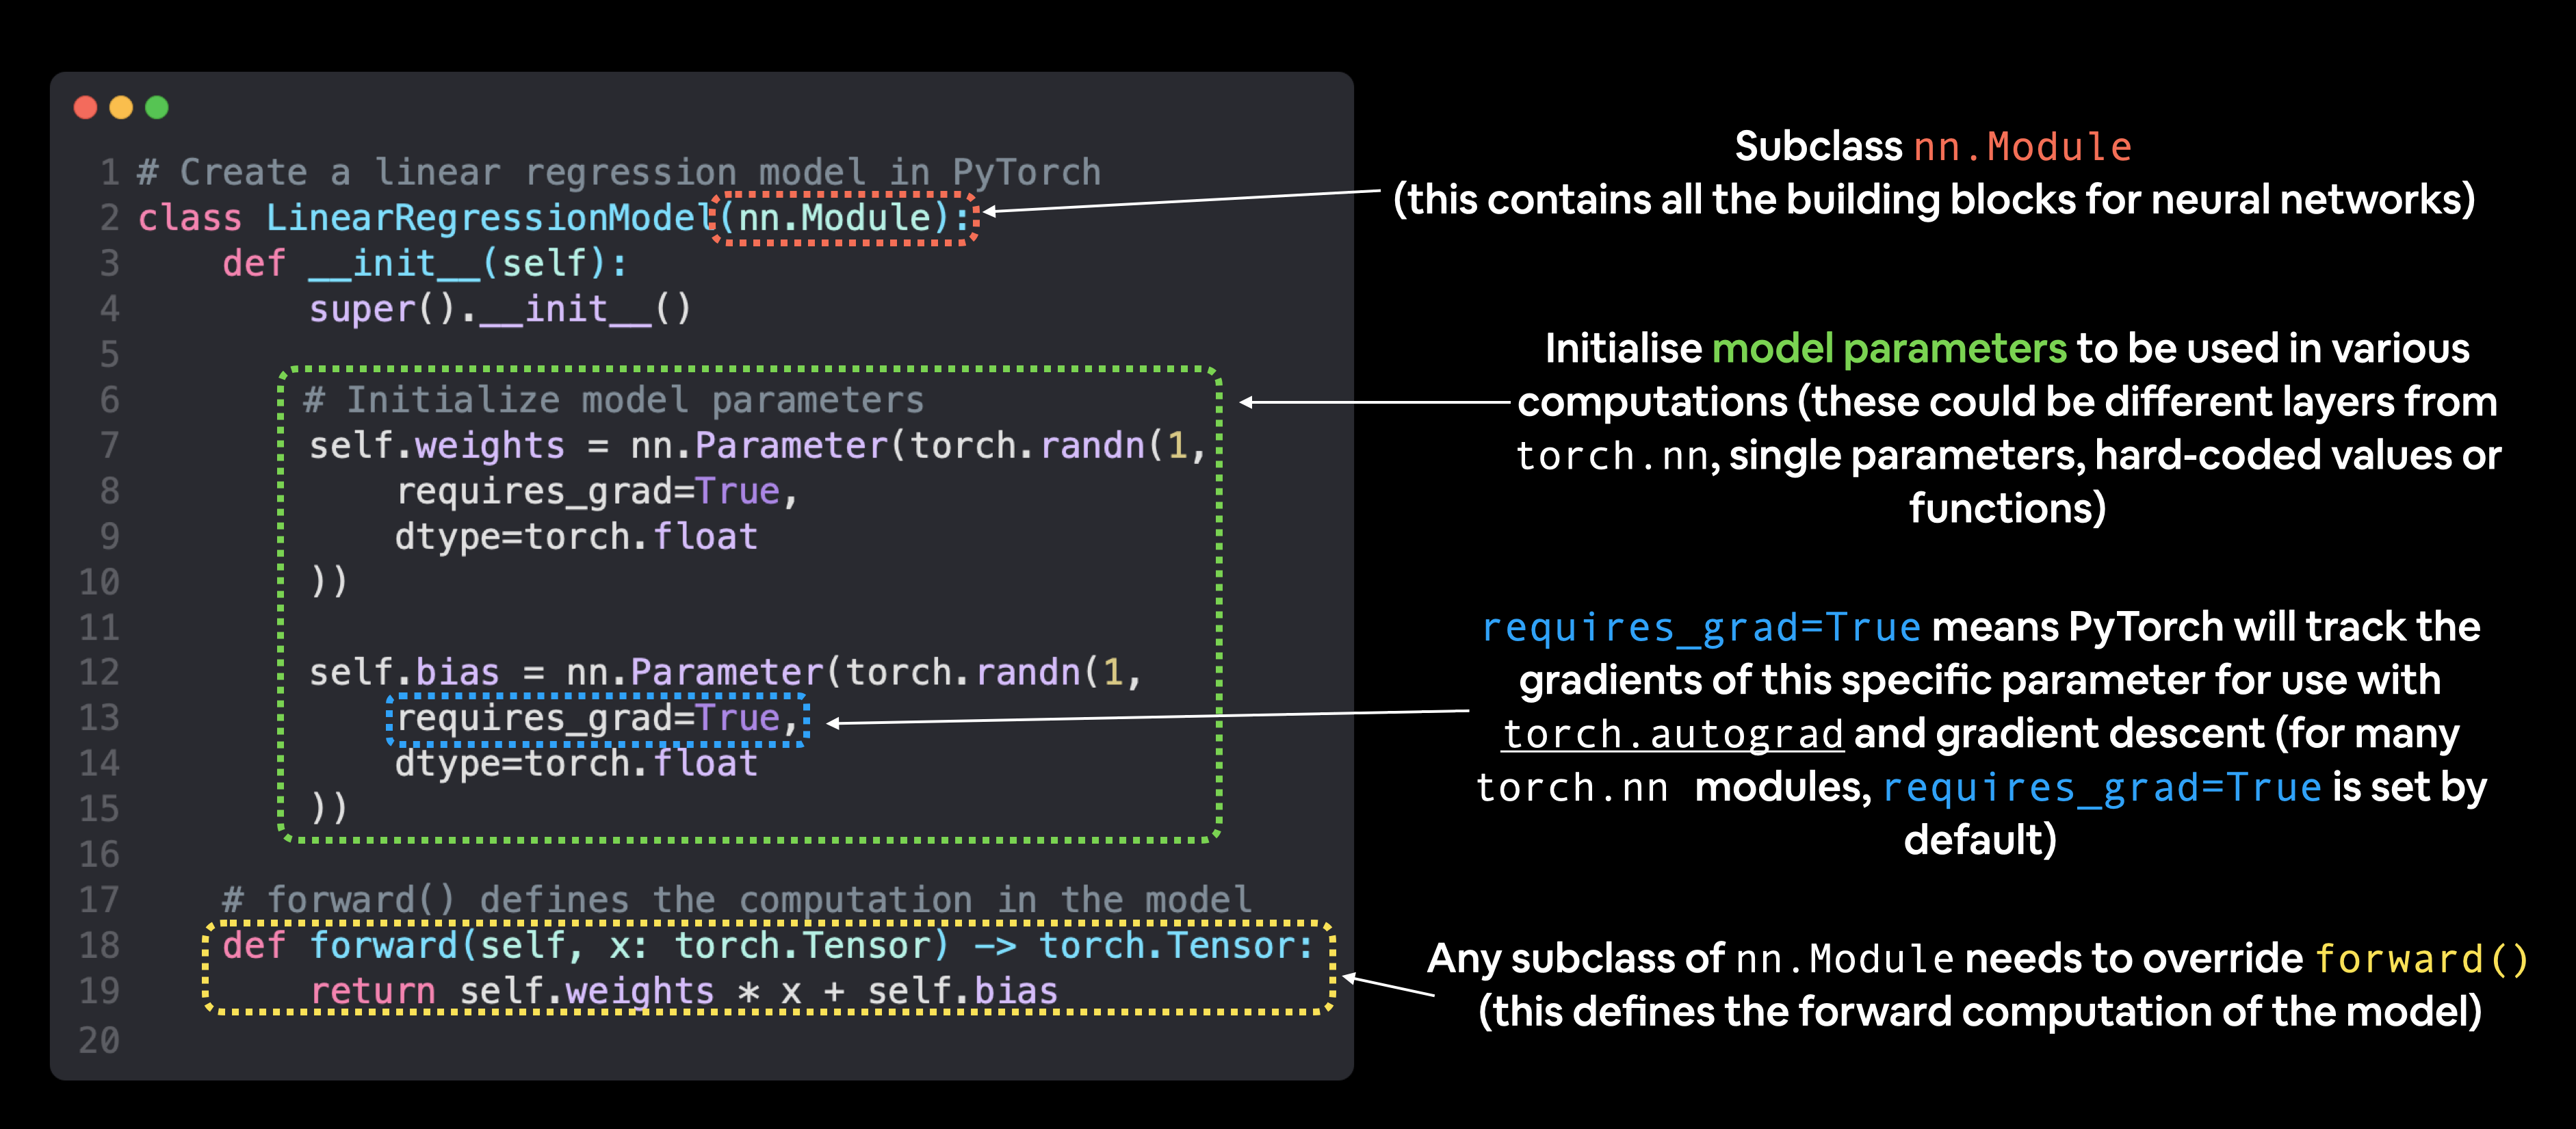

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias




## Essentials for Building a model

### 1. torch.nn - Used to build computational graphs aka Neural networks of the data
### 2. torch.Parameter - Which parameters should our model consider and learn
### 3. torch.nn.Module - Base class which has all neural network models. If you subclass it, you should overwrite forward()
### 4. torch.optim - These are optimizers, helps with gradient descent
### 5.